### Necessary imports

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.api import UECM
import seaborn as sns
from scipy import signal
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.stats.stattools import durbin_watson
from scipy.signal import lfilter
from scipy.signal import savgol_filter
import scienceplots

In [ ]:
n_future = 0
plt.style.use('science')
cmap = 'cmo.curl'
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
try:
    plt.rc('text', usetex = False)
except:
    print('No Tex!')
plt.rc('font', size=SMALL_SIZE,family='serif')          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE,linewidth=1)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [62]:
df = pd.read_csv('./sourcedata/Data.csv', index_col='Zeit')
df.head(10)

,GranetalsperreMin15Niederschlag,HahnenkleeMin15Niederschlag,MargarethenklippeMin15W,MargarethenklippeMin15Q,SennhuetteMin15W,SennhuetteMin15Q,Niederschlag_Gosequelle,Niederschlag_Abzuchtquelle,Pegel_Rammelsberghaus_Q,Pegel_Rammelsberghaus_W,Sensor_Sum,Value,Image_Sum
Zeit,,,,,,,,,,,,,
11/1/2003 0:00,0.0,0.0,6.9,0.033,4.6,0.034,0.0,0.0,0.082,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 0:15,0.0,0.0,7.3,0.038,4.4,0.032,0.0,0.0,0.076,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 0:30,0.0,0.0,7.3,0.038,4.3,0.031,0.0,0.0,0.074,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 0:45,0.0,0.0,7.2,0.037,4.4,0.032,0.0,0.0,0.076,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 1:00,0.0,0.0,7.2,0.037,4.5,0.033,0.0,0.0,0.079,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 1:15,0.0,0.0,7.2,0.037,4.4,0.032,0.0,0.0,0.076,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 1:30,0.0,0.0,7.3,0.038,4.1,0.028,0.0,0.0,0.067,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 1:45,0.0,0.0,7.3,0.038,4.3,0.030,0.0,0.0,0.073,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0
11/1/2003 2:00,0.0,0.0,7.3,0.038,4.3,0.030,0.0,0.0,0.073,10,0.0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.0


### Visualising the timeseries

Correlation between Image sum and water levels at Senhuette:  0.08351812772901089


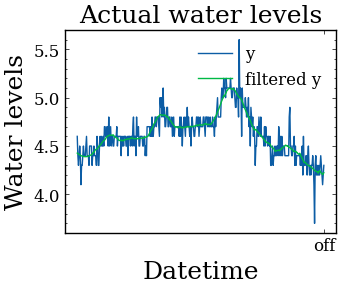

In [63]:
x = df['Image_Sum']
y = df['SennhuetteMin15W']
window = 8
yfilter = pd.Series(savgol_filter(y, 49, 2))
yfilter.index = y.index
print("Correlation between Image sum and water levels at Senhuette: ", x.corr(yfilter))
plt.plot(y[:400], label='y')
plt.plot(yfilter[:400], label='filtered y')
plt.legend(loc="upper right")
plt.title("Actual water levels", fontsize=18)
plt.xlabel('Datetime', fontsize=18)
plt.ylabel('Water levels', fontsize=18)
plt.xticks('off')
plt.show();

In [4]:
x.describe()

count    514176.000000
mean          1.588005
std           9.779089
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         694.700000
Name: Image_Sum, dtype: float64

In [5]:
yfilter.describe()

count    514176.000000
mean          7.975656
std           6.244793
min           1.473188
25%           3.963569
50%           6.039518
75%           9.757096
max         144.718268
dtype: float64

In [ ]:
n_future = 8
lags = 15
order = 96
ydelta = yfilter.diff(n_future)
print("Correlation: rainfall and S.W: ", x.corr(y))
print("\nCorrelation: rainfall and filtered S.W: ", x.corr(yfilter))
print("\nCorrelation: rainfall and Δ S.W: ", x.corr(ydelta))

Correlation: rainfall and S.W:  0.07525113763194247

Correlation: rainfall and filtered S.W:  0.08351812772901089

Correlation: rainfall and Δ S.W:  0.3141369381452148


In [74]:
data = pd.DataFrame([x, yfilter, ydelta]).transpose()
data.columns = ['rainfall', 'S.W', 'Δ S.W']
data

,rainfall,S.W,Δ S.W
11/1/2003 0:00,0.0,4.426920,NaN
11/1/2003 0:15,0.0,4.421534,NaN
11/1/2003 0:30,0.0,4.416573,NaN
11/1/2003 0:45,0.0,4.412036,NaN
11/1/2003 1:00,0.0,4.407923,NaN
...,...,...,...
514171,NaN,NaN,0.0
514172,NaN,NaN,0.0
514173,NaN,NaN,0.0
514174,NaN,NaN,0.0


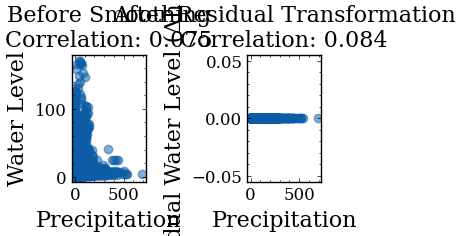

In [83]:
plt.subplot(1, 2, 1)
plt.scatter(x=x, y=y, alpha=0.5)
plt.title(f'Before Smoothing\nCorrelation: {x.corr(y):.3f}')
plt.xlabel('Precipitation')
plt.ylabel('Water Level')

# Scatter plot after
plt.subplot(1, 2, 2)
plt.scatter(x=x, y=ydelta, alpha=0.5)
plt.title(f'After Residual Transformation\nCorrelation: {x.corr(yfilter):.3f}')
plt.xlabel('Precipitation')
plt.ylabel('Residual Water Level (Δh 2hr)')

plt.tight_layout()
plt.show()

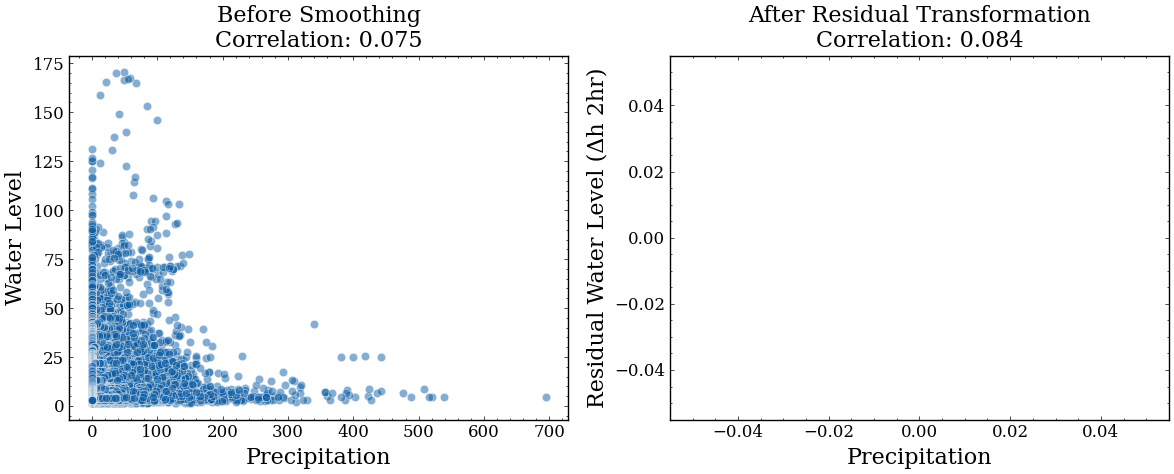

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=x, y=y, data=df, alpha=0.5)
plt.title(f'Before Smoothing\nCorrelation: {x.corr(y):.3f}')
plt.xlabel('Precipitation')
plt.ylabel('Water Level')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['rainfall'], y=data['Δ S.W'], data=data, alpha=0.5)
plt.title(f'After Residual Transformation\nCorrelation: {data["rainfall"].corr(data["Δ S.W"]):.3f}')
plt.xlabel('Precipitation')
plt.ylabel('Residual Water Level (Δh 2hr)')

plt.tight_layout()
plt.show()

### Stationarity of data

In [9]:
def check_stationarity(series):
    result = adfuller(series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

print("Checking stationarity for X data (Image_sum):\n")
check_stationarity(x)
print("\nChecking stationarity for filtered y data (SennhuetteMin15W):\n")
check_stationarity(yfilter)

Checking stationarity for X data (Image_sum):

ADF Statistic: -58.178741
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary

Checking stationarity for filtered y data (SennhuetteMin15W):

ADF Statistic: -18.551477
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary


In [10]:
print("\nChecking stationarity for Δ S.W:\n")
check_stationarity(ydelta.dropna())


Checking stationarity for Δ S.W:

ADF Statistic: -64.645652
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary


### Autocorrelation and partial-autocorrelation plot (ACF and PACF)

In [11]:
def autocorrelation(deviations: pd.DataFrame, lags: int = 16) -> pd.Series:
    return sm.tsa.stattools.acf(deviations, nlags=lags)

def partial_autocorrelation(deviations: pd.DataFrame, lags: int = 16) -> pd.Series:
    return sm.tsa.pacf(deviations, nlags=lags)


def curvefitting(deviations: pd.Series, coeff: pd.Series, lags: int = 15) -> pd.Series:
    coeff = coeff[0 : lags + 1]
    curve = 0
    for i in range(lags):
        curve += coeff[i + 1] * deviations.iloc[lags - i :]
    return curve


def model_autocorrelation(tau: pd.Series, deviations: pd.Series, lag: int) -> pd.Series:
    acf_coeff = autocorrelation(deviations, lag)
    acf_deviations = curvefitting(deviations, acf_coeff, lag)
    return acf_coeff, acf_deviations


def model_partial_autocorrelation(tau: pd.Series, deviations: pd.Series, lag: int) -> pd.Series:
    pacf_coeff = partial_autocorrelation(deviations, lag)
    pacf_deviations = curvefitting(deviations, pacf_coeff, lag)
    #pd.DataFrame(pacf_coeff).to_excel("pacf_coefficients.xlsx")
    return pacf_coeff, pacf_deviations

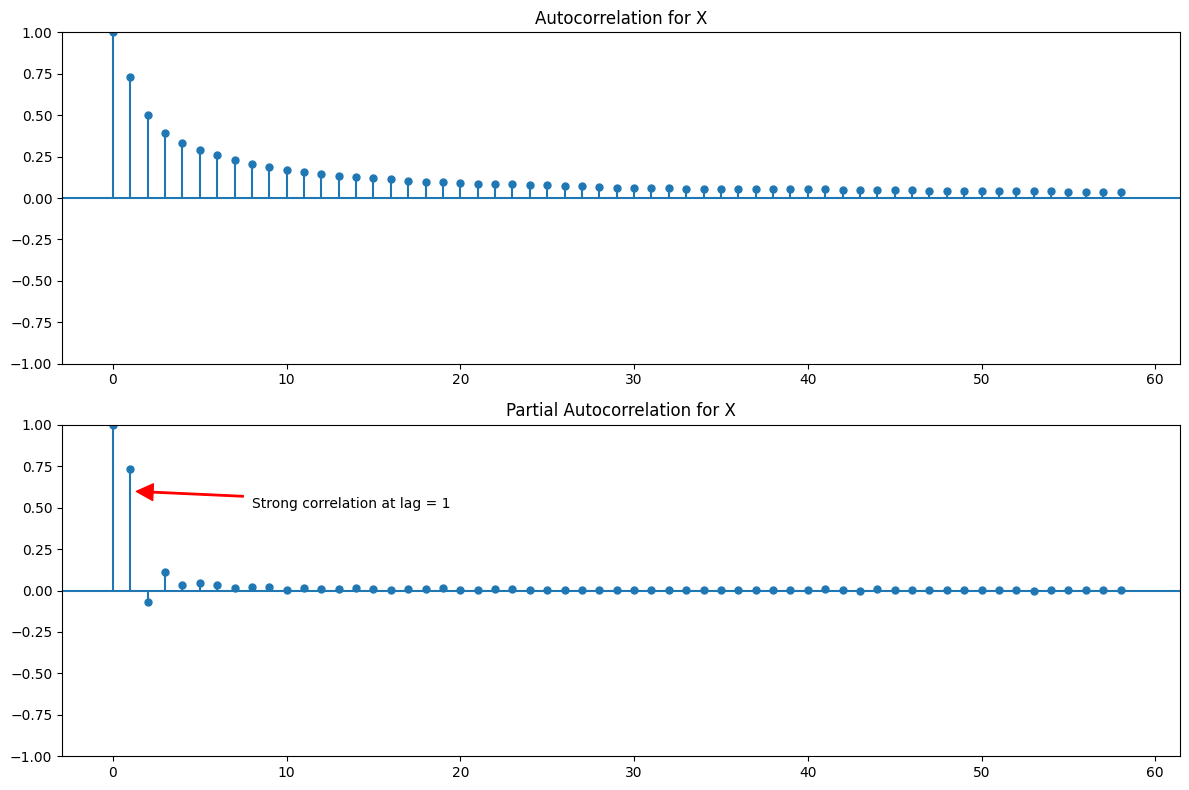

In [12]:
height = 4
width = 12
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(x, ax=ax[0])
plot_pacf(x, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[0].set_title("Autocorrelation for X")
ax[1].set_title("Partial Autocorrelation for X")
plt.tight_layout()
plt.savefig(f'output/predictions/benchmark_results/ACF and PACF (X data).png')
plt.show()

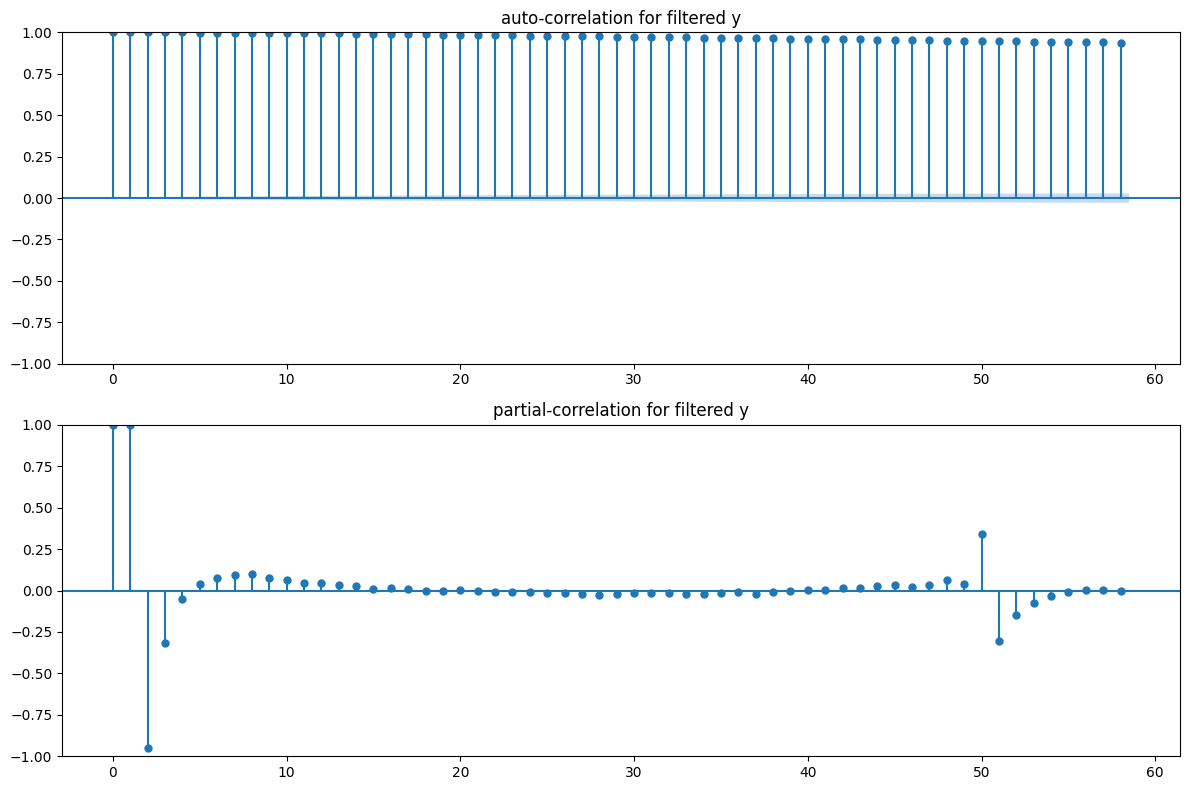

In [13]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(yfilter, ax=ax[0])
plot_pacf(yfilter, ax=ax[1], method='ols')
ax[0].set_title("auto-correlation for filtered y")
ax[1].set_title("partial-correlation for filtered y")
plt.tight_layout()
plt.savefig(f'output/predictions//benchmark_results/ACF and PACF (y filtered data).png')
plt.show()

In [14]:
acf_coeff, acf_deviations = model_autocorrelation(df.index, yfilter, 20)
pacf_coeff, pacf_deviations = model_partial_autocorrelation(df.index, yfilter, 20)

print("ACF coefficients: \n",acf_coeff)
print("\n\nPACF coefficients: \n",pacf_coeff)

ACF coefficients: 
 [1.         0.99995283 0.99981787 0.99959674 0.99929163 0.99890492
 0.99843935 0.99789804 0.99728443 0.99660212 0.99585492 0.99504674
 0.99418164 0.99326374 0.99229718 0.99128605 0.99023449 0.98914655
 0.98802612 0.98687701 0.98570293]


PACF coefficients: 
 [ 1.00000000e+00  9.99954774e-01 -9.70615888e-01 -1.84427343e-01
  7.56353670e-02  8.97322378e-02  9.46518681e-02  1.08771747e-01
  1.00446838e-01  6.53307697e-02  4.98513327e-02  3.61146036e-02
  3.96017056e-02  2.09908367e-02  2.12371960e-02  5.10160356e-05
  1.95280639e-02  7.14599061e-03 -9.51308621e-03 -2.04970396e-03
  4.49922093e-03]


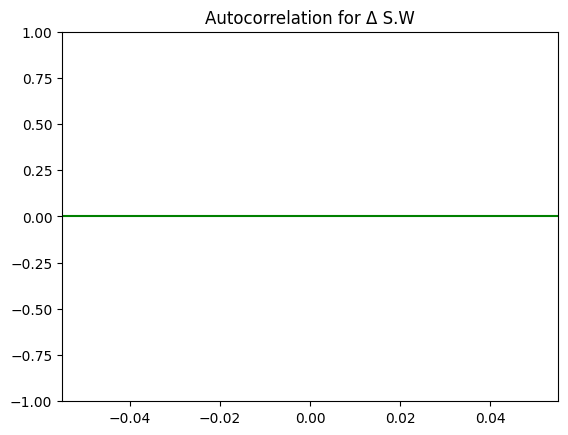

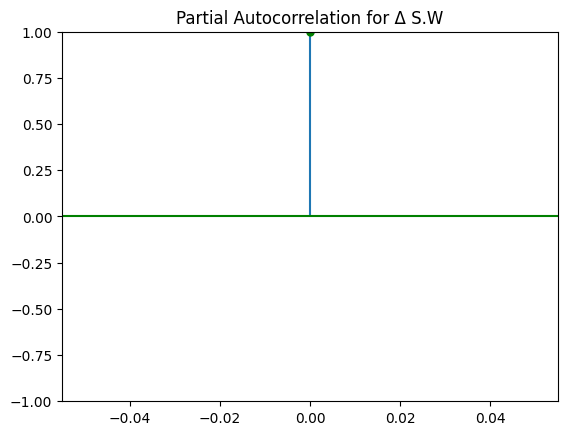

In [15]:
plot_acf(data['Δ S.W'], lags=order, color="g", title=f"Autocorrelation for Δ S.W");
plot_pacf(data['Δ S.W'], lags=order, color="g", title=f"Partial Autocorrelation for Δ S.W");

### Granger causality Tests

Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

In [16]:
print('Image_sum causes SennhuetteMin15W?')
print('------------------------------------')
granger1 = grangercausalitytests(df[['Image_Sum', 'SennhuetteMin15W']], maxlag=1)
print('------------------------------------')
print('\nSennhuetteMin15W causes Image_sum?')
print('------------------------------------')
granger2 = grangercausalitytests(df[['SennhuetteMin15W', 'Image_Sum']], maxlag=1)

Image_sum causes SennhuetteMin15W?
------------------------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=331.6761, p=0.0000  , df_denom=514172, df_num=1
ssr based chi2 test:   chi2=331.6780, p=0.0000  , df=1
likelihood ratio test: chi2=331.5711, p=0.0000  , df=1
parameter F test:         F=331.6761, p=0.0000  , df_denom=514172, df_num=1
------------------------------------

SennhuetteMin15W causes Image_sum?
------------------------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=991.9617, p=0.0000  , df_denom=514172, df_num=1
ssr based chi2 test:   chi2=991.9675, p=0.0000  , df=1
likelihood ratio test: chi2=991.0118, p=0.0000  , df=1
parameter F test:         F=991.9617, p=0.0000  , df_denom=514172, df_num=1


From the above results we can say that the corresponding X series causes the y and vice-versa (since the p values for both sides are 0.0000), hence the variables are interchaneably causing each other.

### Cointegration Test 

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

When we have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated.

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

In [17]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

data = pd.DataFrame([x, yfilter]).transpose()
cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Image_Sum ::  42898.89  > 12.3212   =>   True
Unnamed 0 ::  279.06    > 4.1296    =>   True


### Cross correlation

In [57]:
for i in range(n_future, order): 
    data[f'rainfall_t-{i}'] = data['rainfall'].shift(i)

for i in range(n_future, lags): 
    data[f'Δ S.W_t-{i}'] = data['Δ S.W'].shift(i)

data = data[order:] # slicing and removing first 96 records
data[0:20]

,rainfall,S.W,Δ S.W,rainfall_t-0,rainfall_t-1,rainfall_t-2,rainfall_t-3,rainfall_t-4,rainfall_t-5,rainfall_t-6,...,Δ S.W_t-5,Δ S.W_t-6,Δ S.W_t-7,Δ S.W_t-8,Δ S.W_t-9,Δ S.W_t-10,Δ S.W_t-11,Δ S.W_t-12,Δ S.W_t-13,Δ S.W_t-14
Zeit,,,,,,,,,,,,,,,,,,,,,
11/1/2003 12:30,0.0,4.603206,0.052538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.058573,0.056234,0.059684,0.065564,0.068402,0.062075,0.056693,0.050696,0.051664,0.057695
11/1/2003 12:45,0.0,4.607635,0.050663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.061207,0.058573,0.056234,0.059684,0.065564,0.068402,0.062075,0.056693,0.050696,0.051664
11/1/2003 13:00,0.0,4.611425,0.051919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.066295,0.061207,0.058573,0.056234,0.059684,0.065564,0.068402,0.062075,0.056693,0.050696
11/1/2003 13:15,0.0,4.611790,0.044063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.063728,0.066295,0.061207,0.058573,0.056234,0.059684,0.065564,0.068402,0.062075,0.056693
11/1/2003 13:30,0.0,4.611440,0.035350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.056893,0.063728,0.066295,0.061207,0.058573,0.056234,0.059684,0.065564,0.068402,0.062075
11/1/2003 13:45,0.0,4.613085,0.022996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.052538,0.056893,0.063728,0.066295,0.061207,0.058573,0.056234,0.059684,0.065564,0.068402
11/1/2003 14:00,0.0,4.609926,0.012470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050663,0.052538,0.056893,0.063728,0.066295,0.061207,0.058573,0.056234,0.059684,0.065564
11/1/2003 14:15,0.0,4.612071,0.011147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.051919,0.050663,0.052538,0.056893,0.063728,0.066295,0.061207,0.058573,0.056234,0.059684
11/1/2003 14:30,0.0,4.616761,0.013555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044063,0.051919,0.050663,0.052538,0.056893,0.063728,0.066295,0.061207,0.058573,0.056234


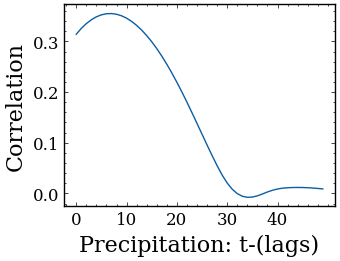

In [58]:
l = []
n = []
for i in range(n_future, order):
    #print(i, data['Δ S.W'].corr(data[f'rainfall_t-{i}']))
    n.append(i)
    l.append(data['Δ S.W'].corr(data[f'rainfall_t-{i}']))
    
#plt.rcParams["font.family"] = "cursive"
plt.xlabel('Precipitation: t-(lags)')
plt.ylabel('Correlation')
plt.xticks(np.arange(n_future, order, 10)) 
#plt.title('Correlation between Δ S.W and Precipitation', pad=10, fontsize=12)
plt.plot(n, l);

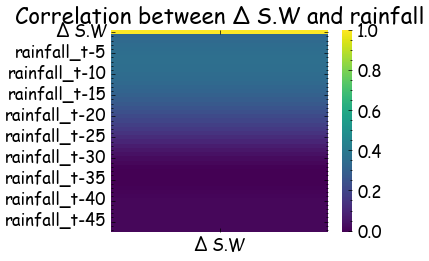

In [38]:
corr = data.loc[:, 'Δ S.W':f'rainfall_t-{order-1}'].corr()
diff_corr = corr[['Δ S.W']]

ax = plt.axes()
ax.set_title('Correlation between Δ S.W and rainfall')
sns.heatmap(diff_corr, cmap='viridis', ax = ax);

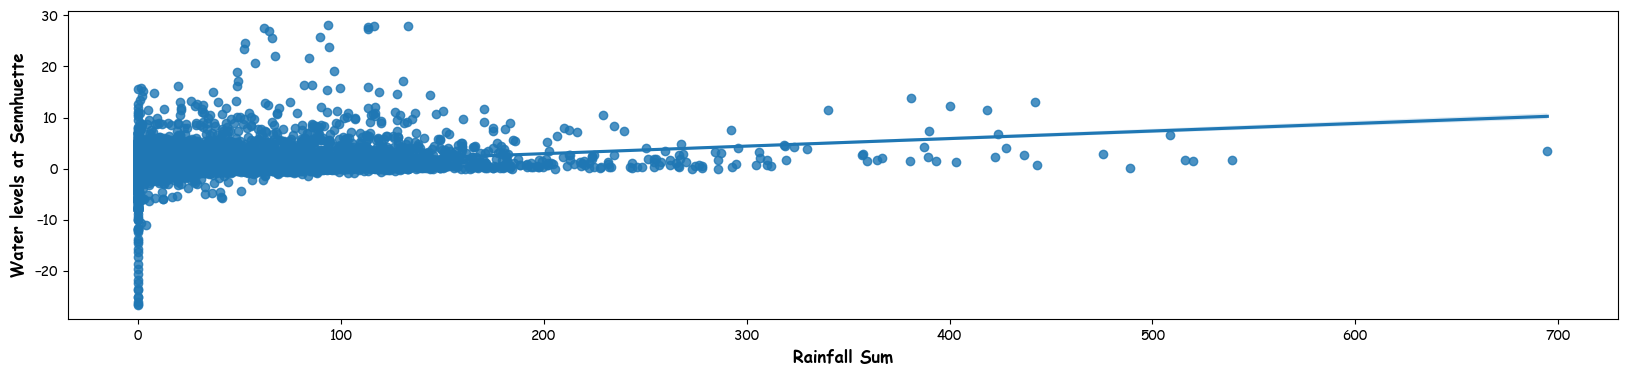

In [23]:
fig = plt.figure(figsize = (20, 4))
sns.regplot(data = data, x = 'rainfall', y ='Δ S.W')
plt.ylabel('Water levels at Sennhuette', weight='bold', fontsize = 12)
plt.xlabel('Rainfall Sum', weight='bold', fontsize = 12)
plt.show()

Now, we can see there is almost no correlation between the two series when we pair the data at the same time point, which is the case of the simple correlation. 

But sometimes, two time series move synchronously at different time point and this information captured only by lagging, or as the case maybe, leading the values of either of the time series against the other. And cross correlation is the method that accounts for that.

In [24]:
def crosscorrelation_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
def crosscorrelation_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(25, 5))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label=f'5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, linestyle='--')
    ax.set(ylim = [-0.5, 0.5])
    ax.set_title('Cross Correation Rainfall sum and water levels at Sennhuette', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()

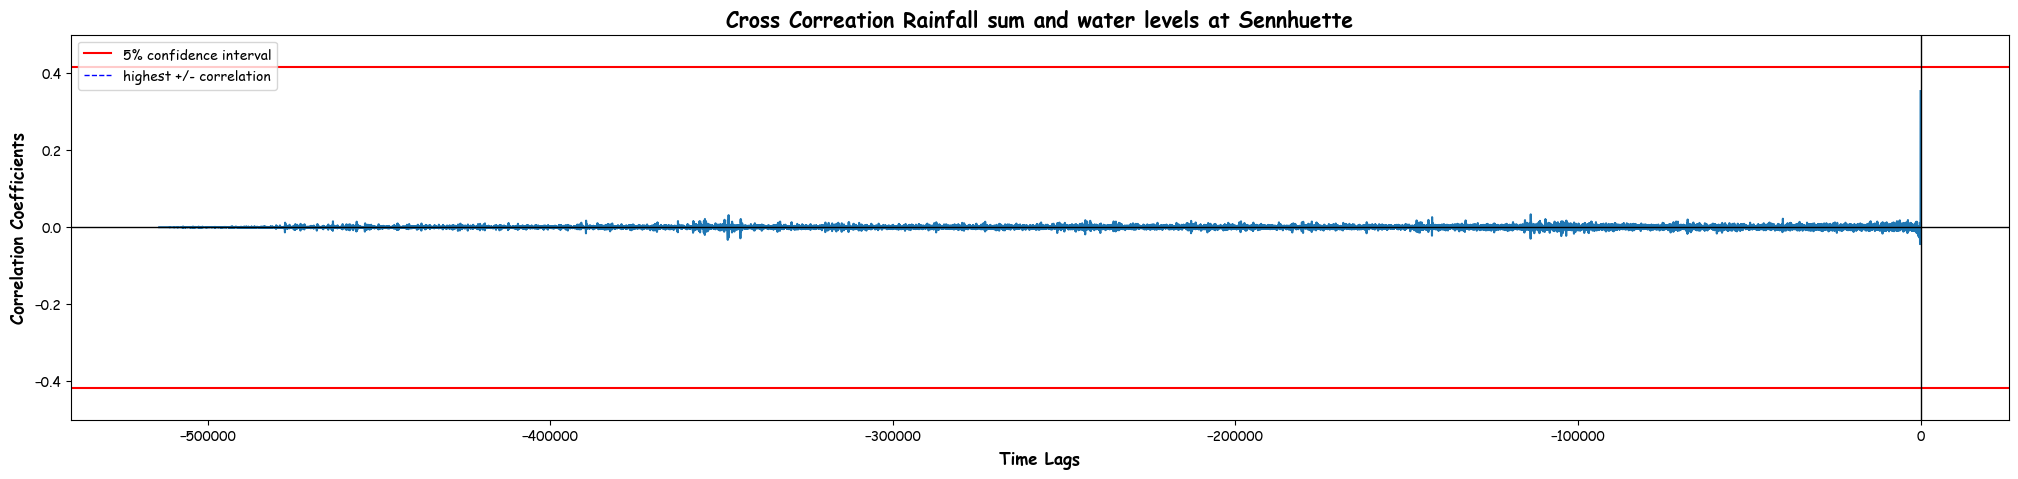

In [25]:
crosscorrelation_plot(signal.correlation_lags(len(x), len(ydelta)), crosscorrelation_values(x, ydelta) )

### Boxplot

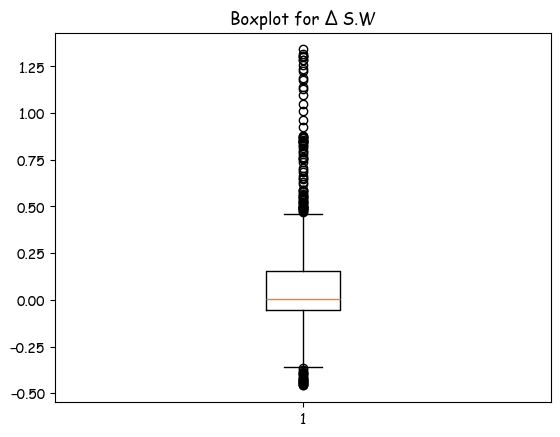

In [26]:
plt.boxplot(data['Δ S.W'][6000:7000], vert=True, );
plt.title('Boxplot for Δ S.W');

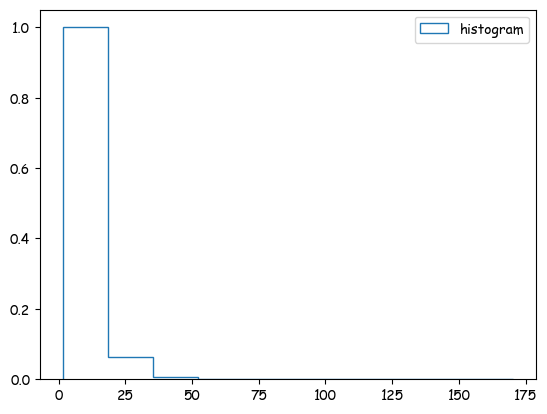

In [27]:
plt.hist(y, density=True, histtype="step", cumulative=-1,
            label="histogram")
plt.legend()